In [54]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Reading both Training and Testing file separately....
df_train_doc=pd.read_excel('Final_Train_Doctor.xlsx')
df_test_doc=pd.read_excel('Final_Test_Doctor.xlsx')

# Also Making a same column in both named dataset so thta at any point we can separate training and testing dataset....
df_train_doc['Dataset']="Train"
df_test_doc['Dataset']="Test"

In [56]:
# Concatenating the Training and Testing dataset....
df=pd.concat([df_train_doc,df_test_doc],ignore_index=True)
df

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...,...
7943,Test,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,Test,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,Test,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,Test,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [57]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 7948 rows and 8 columns.
df.shape

(7948, 8)

In [58]:
# No duplicates entries
df.drop_duplicates(inplace=True)
df
# Dropping duplicate entries...

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...,...
7943,Test,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,Test,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,Test,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,Test,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [59]:
# checking the Features information regarding the dataset....
df.info()
# Only one float datatype and rest are object datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 7947
Data columns (total 8 columns):
Dataset               7897 non-null object
Experience            7897 non-null object
Fees                  5921 non-null float64
Miscellaneous_Info    4493 non-null object
Place                 7894 non-null object
Profile               7897 non-null object
Qualification         7897 non-null object
Rating                3556 non-null object
dtypes: float64(1), object(7)
memory usage: 555.3+ KB


In [60]:
# Checking first few rows...
df.head(50)

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
5,Train,8 years experience,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN
6,Train,42 years experience,200.0,NaN,"Karol Bagh, Delhi",Homeopath,BHMS,NaN
7,Train,10 years experience,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore",Dentist,BDS,99%
8,Train,14 years experience,100.0,NaN,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN
9,Train,23 years experience,100.0,NaN,"Athani, Ernakulam",Dentist,"BSc, BDS",NaN


In [61]:
# Checking the null values
df.isnull().sum()

Dataset                  0
Experience               0
Fees                  1976
Miscellaneous_Info    3404
Place                    3
Profile                  0
Qualification            0
Rating                4341
dtype: int64

In [62]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in Dataset are 2 
Number of unique values in Experience are 64 
Number of unique values in Fees are 40 
Number of unique values in Miscellaneous_Info are 3980 
Number of unique values in Place are 948 
Number of unique values in Profile are 6 
Number of unique values in Qualification are 1801 
Number of unique values in Rating are 52 


In [63]:
#Lets check the value counts of object type columns...
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Train    5921
Test     1976
Name: Dataset, dtype: int64

9 years experience     419
10 years experience    404
8 years experience     378
11 years experience    372
12 years experience    358
                      ... 
61 years experience      1
64 years experience      1
60 years experience      1
66 years experience      1
58 years experience      1
Name: Experience, Length: 64, dtype: int64

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth    50
Skin Allergy Treatment Skin Allergies Dermabrasion                    18
Tooth Extraction Dental Fillings Scaling / Polishing                  16
Dental Fillings Zirconia Crowns Dental Implant Fixing                 15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment               14
                                                                      ..
85% 1 Feedback Andheri East, Mumbai                                    1
94% 13 Feedback Kalamassery, Ernakulam                                 1
RCT - Root Canal T

## Feature Engineering:

In [64]:
# We can convert experience column to datatype int
# At fisrt we need to strip off " years experience"
df["Experience"]=df["Experience"].str.strip(" years experience")
df

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,Test,4,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,Test,9,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,Test,12,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [65]:
# Splitting Values Of Place
df['Area']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[1]
df.head(50)

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Area,City
0,Train,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Kakkanad,Ernakulam
1,Train,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Whitefield,Bangalore
2,Train,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Mathikere - BEL,Bangalore
3,Train,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Bannerghatta Road,Bangalore
4,Train,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Keelkattalai,Chennai
5,Train,8,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,Porur,Chennai
6,Train,42,200.0,NaN,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,Karol Bagh,Delhi
7,Train,10,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore",Dentist,BDS,99%,Arekere,Bangalore
8,Train,14,100.0,NaN,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,Old City,Hyderabad
9,Train,23,100.0,NaN,"Athani, Ernakulam",Dentist,"BSc, BDS",NaN,Athani,Ernakulam


In [66]:
# Stripping Off '%' from the 'Rating' .... 
df["Rating"]=df["Rating"].str.strip("%")
df

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Area,City
0,Train,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,Kakkanad,Ernakulam
1,Train,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,Whitefield,Bangalore
2,Train,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Mathikere - BEL,Bangalore
3,Train,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Bannerghatta Road,Bangalore
4,Train,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,Basavanagudi,Bangalore
7944,Test,4,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,Choolai,Chennai
7945,Test,9,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,Porur,Chennai
7946,Test,12,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98,Arekere,Bangalore


In [67]:
# Deepdive into medical specializations - creating flags based on degree and specializations
# In this I have created Different degrees and courses in different Proffesions of Doctors...

# Ayurveda
df['ayurveda_bams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b'),1,0)
df['ayurveda_ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ayurveda_md'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# Dentist
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_orthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'orthodon', case=False),1,0)
df['dentist_periodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'periodon', case=False),1,0)
df['dentist_prosthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'prosthodon', case=False),1,0)
df['dentist_oralandmaxi'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
df['dentist_cosmetic'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# Dermatology
df['dermatology_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['dermatology_venereology'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDV\b') | df.Qualification.str.contains(r'venereology', case=False)),1,0)
df['dermatology_leprosy'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDVL\b') | df.Qualification.str.contains(r'leprosy', case=False)),1,0)
df['dermatology_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['dermatology_cosmetic'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# ENT - MS, Otorhinolaryngology, Oncology
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)

# Homeopathy - BHMS, DHMS, MD
df['homeopath_bhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bBHMS\b'),1,0)
df['homeopath_dhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bDHMS\b'),1,0)
df['homeopath_md'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# GM - Cardiology, Orthopedic Surgery, Gastroenterology, Urology, Dermatology, Anesthesiology, Plastic Surgery, 
#      Radiology, Emergency Medicine, General Surgery, Diabetology, Child/Pediatrics, Tuberculosis and Chest Diseases,
#      Pharmacology, Maternity, Obstetrics & Gynaecology, Pathology, Pulmonary, Nephrology, Neurology, Sports, Oncology,
#      Acupuncture, Psychiatry, Endocrinology, breast, Rheumatology, Ophthalmology/Opthalmology.
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_cardio'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'cardio', case=False),1,0)
df['gm_surgery'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'surgery', case=False),1,0)
df['gm_diabet'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'diabet', case=False),1,0)
df['gm_child'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'child', case=False) | df.Qualification.str.contains(r'pediat', case=False)),1,0)
df['gm_chest'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'chest', case=False) | df.Qualification.str.contains(r'tuber', case=False)),1,0)
df['gm_obstet'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'obstet', case=False) | df.Qualification.str.contains(r'gyna', case=False)),1,0)
df['gm_pulmonary'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'pulmonary', case=False),1,0)
df['gm_psych'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'psych', case=False),1,0)
df['gm_endocrin'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'endocrin', case=False),1,0)
df['gm_rheum'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'rheum', case=False),1,0)

# Create columns for diploma and fellowship
df[df.Profile == 'Ayurveda'].head(100)


,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Area,City,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
1,Train,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,Whitefield,Bangalore,...,0,0,0,0,0,0,0,0,0,0
3,Train,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Bannerghatta Road,Bangalore,...,0,0,0,0,0,0,0,0,0,0
4,Train,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,Keelkattalai,Chennai,...,0,0,0,0,0,0,0,0,0,0
5,Train,8,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,Porur,Chennai,...,0,0,0,0,0,0,0,0,0,0
11,Train,7,100.0,NaN,"Somajiguda, Hyderabad",Ayurveda,BAMS,NaN,Somajiguda,Hyderabad,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Train,13,200.0,"98% 17 Feedback AS Rao Nagar, Hyderabad","AS Rao Nagar, Hyderabad",Ayurveda,"BAMS, MS - Ayurveda, MSc - Psychology",98,AS Rao Nagar,Hyderabad,...,0,0,0,0,0,0,0,0,0,0
718,Train,15,200.0,NaN,"J.C Nagar, Bangalore",Ayurveda,"MD - Ayurvedic Pharmacology, BAMS",100,J.C Nagar,Bangalore,...,0,0,0,0,0,0,0,0,0,0
723,Train,8,500.0,NaN,"Naraina Vihar, Delhi",Ayurveda,BAMS,NaN,Naraina Vihar,Delhi,...,0,0,0,0,0,0,0,0,0,0
735,Train,16,50.0,NaN,"Bhayandar East, Mumbai",Ayurveda,BAMS,NaN,Bhayandar East,Mumbai,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Miscellaneous_Info is a special information unique to the doctor,so its impossible to impute it
# So we will replace null values as missing
df["Miscellaneous_Info"].fillna("missing",inplace=True)

In [69]:
#     Now in this step I am storing Feedback values from Miscellaneous_Info into 'Feedback' Feature and 
#                       stripping off rest as they won't be much useful... 
import re
def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df['Feedback'] = df['Miscellaneous_Info'].apply(get_feedback)
df['Feedback'] = df['Feedback'].str.strip('Feedback')
df['Feedback'] = df['Feedback'].astype(int)
df

,Dataset,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Area,City,...,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback
0,Train,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,Kakkanad,Ernakulam,...,0,0,0,0,0,0,0,0,0,16
1,Train,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,Whitefield,Bangalore,...,0,0,0,0,0,0,0,0,0,76
2,Train,9,300.0,missing,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Mathikere - BEL,Bangalore,...,0,0,0,0,0,0,0,0,0,0
3,Train,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Bannerghatta Road,Bangalore,...,0,0,0,0,0,0,0,0,0,0
4,Train,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,Keelkattalai,Chennai,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,Test,10,NaN,missing,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,Basavanagudi,Bangalore,...,0,0,0,0,0,0,0,0,0,0
7944,Test,4,NaN,missing,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,Choolai,Chennai,...,0,0,0,0,0,0,0,0,0,0
7945,Test,9,NaN,missing,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,Porur,Chennai,...,0,0,0,0,1,0,0,0,0,0
7946,Test,12,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98,Arekere,Bangalore,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Checking Datatype....
df.dtypes

Dataset                     object
Experience                  object
Fees                       float64
Miscellaneous_Info          object
Place                       object
Profile                     object
Qualification               object
Rating                      object
Area                        object
City                        object
ayurveda_bams                int32
ayurveda_ms                  int32
ayurveda_md                  int32
dentist_bds                  int32
dentist_mds                  int32
dentist_orthodontics         int32
dentist_periodontics         int32
dentist_prosthodontics       int32
dentist_oralandmaxi          int32
dentist_cosmetic             int32
dermatology_md               int32
dermatology_venereology      int32
dermatology_leprosy          int32
dermatology_dnb              int32
dermatology_cosmetic         int32
ent_ms                       int32
ent_otorhinolaryngology      int32
ent_oncology                 int32
homeopath_bhms      

In [71]:
# Dropping columns on which  i have done Featured engineering so that data duplication can't be done....
df.drop(['Place','Qualification','Miscellaneous_Info'],axis=1,inplace=True)
df.dtypes

Dataset                     object
Experience                  object
Fees                       float64
Profile                     object
Rating                      object
Area                        object
City                        object
ayurveda_bams                int32
ayurveda_ms                  int32
ayurveda_md                  int32
dentist_bds                  int32
dentist_mds                  int32
dentist_orthodontics         int32
dentist_periodontics         int32
dentist_prosthodontics       int32
dentist_oralandmaxi          int32
dentist_cosmetic             int32
dermatology_md               int32
dermatology_venereology      int32
dermatology_leprosy          int32
dermatology_dnb              int32
dermatology_cosmetic         int32
ent_ms                       int32
ent_otorhinolaryngology      int32
ent_oncology                 int32
homeopath_bhms               int32
homeopath_dhms               int32
homeopath_md                 int32
gm_md               

In [72]:
# Checking null values...
df.isnull().sum()

Dataset                       0
Experience                    0
Fees                       1976
Profile                       0
Rating                     4341
Area                          3
City                          4
ayurveda_bams                 0
ayurveda_ms                   0
ayurveda_md                   0
dentist_bds                   0
dentist_mds                   0
dentist_orthodontics          0
dentist_periodontics          0
dentist_prosthodontics        0
dentist_oralandmaxi           0
dentist_cosmetic              0
dermatology_md                0
dermatology_venereology       0
dermatology_leprosy           0
dermatology_dnb               0
dermatology_cosmetic          0
ent_ms                        0
ent_otorhinolaryngology       0
ent_oncology                  0
homeopath_bhms                0
homeopath_dhms                0
homeopath_md                  0
gm_md                         0
gm_cardio                     0
gm_surgery                    0
gm_diabe

In [73]:
# Replacing null values with o and 'missing' in Rating, Area and City....
df["Rating"].fillna("0",inplace=True)
df["Area"].fillna('missing',inplace=True)
df["City"].fillna('missing',inplace=True)

In [74]:
# Now changing the datatype of 'Rating' and 'Experience'.....
df['Rating'] = df['Rating'].astype(int)
df['Experience'] = df['Experience'].astype(int)

In [75]:
# checking the datatypes...
df.dtypes

Dataset                     object
Experience                   int32
Fees                       float64
Profile                     object
Rating                       int32
Area                        object
City                        object
ayurveda_bams                int32
ayurveda_ms                  int32
ayurveda_md                  int32
dentist_bds                  int32
dentist_mds                  int32
dentist_orthodontics         int32
dentist_periodontics         int32
dentist_prosthodontics       int32
dentist_oralandmaxi          int32
dentist_cosmetic             int32
dermatology_md               int32
dermatology_venereology      int32
dermatology_leprosy          int32
dermatology_dnb              int32
dermatology_cosmetic         int32
ent_ms                       int32
ent_otorhinolaryngology      int32
ent_oncology                 int32
homeopath_bhms               int32
homeopath_dhms               int32
homeopath_md                 int32
gm_md               

# Univariant Analysis

Experience                    AxesSubplot(0.125,0.808774;0.168478x0.0712264)
Fees                       AxesSubplot(0.327174,0.808774;0.168478x0.0712264)
Rating                     AxesSubplot(0.529348,0.808774;0.168478x0.0712264)
ayurveda_bams              AxesSubplot(0.731522,0.808774;0.168478x0.0712264)
ayurveda_ms                   AxesSubplot(0.125,0.723302;0.168478x0.0712264)
ayurveda_md                AxesSubplot(0.327174,0.723302;0.168478x0.0712264)
dentist_bds                AxesSubplot(0.529348,0.723302;0.168478x0.0712264)
dentist_mds                AxesSubplot(0.731522,0.723302;0.168478x0.0712264)
dentist_orthodontics           AxesSubplot(0.125,0.63783;0.168478x0.0712264)
dentist_periodontics        AxesSubplot(0.327174,0.63783;0.168478x0.0712264)
dentist_prosthodontics      AxesSubplot(0.529348,0.63783;0.168478x0.0712264)
dentist_oralandmaxi         AxesSubplot(0.731522,0.63783;0.168478x0.0712264)
dentist_cosmetic              AxesSubplot(0.125,0.552358;0.168478x0.0712264)

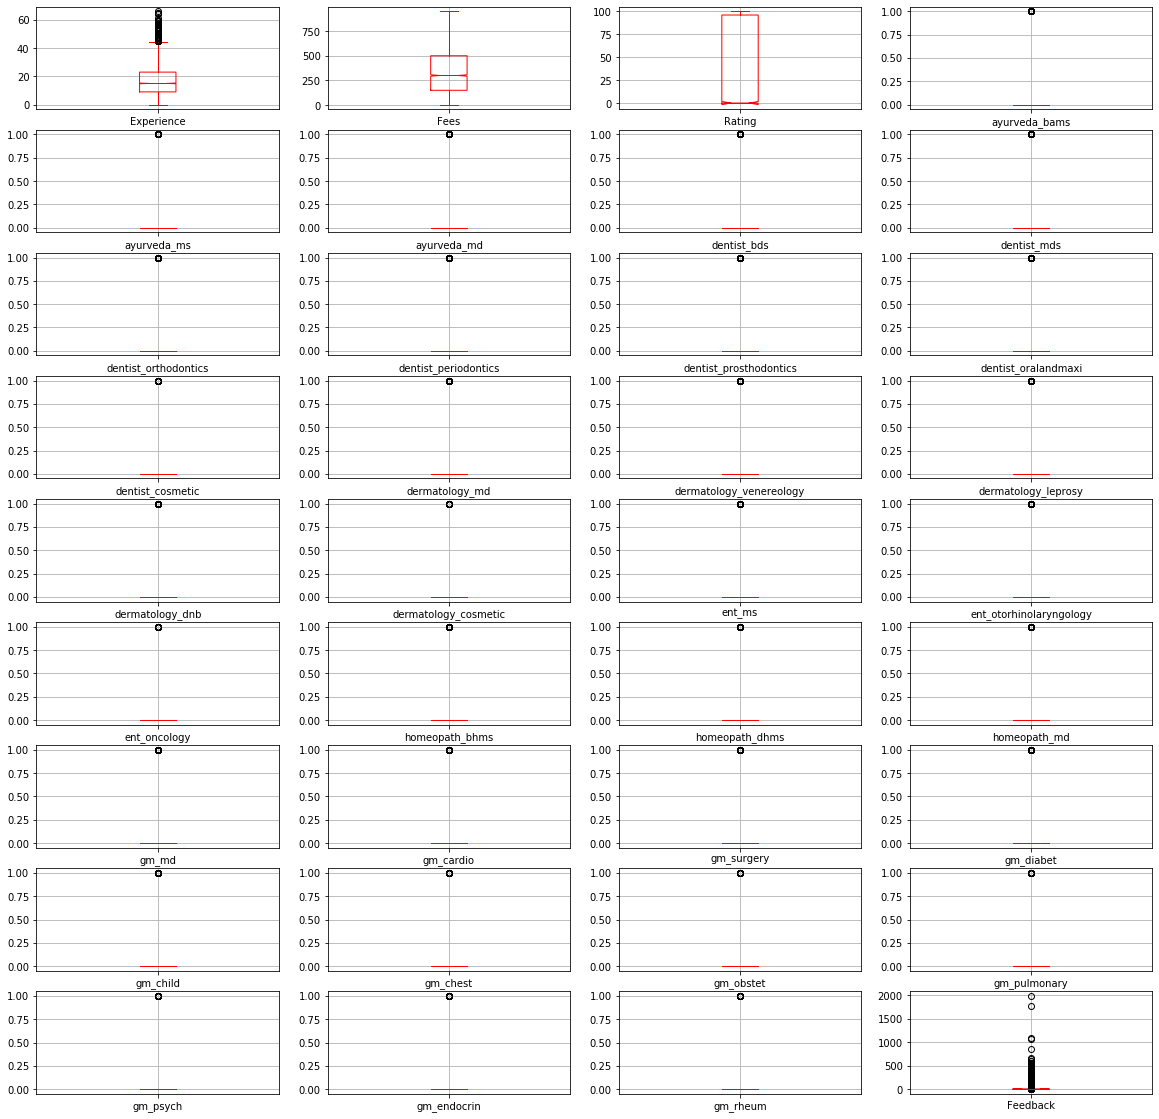

In [76]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(9,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172C8D3B748>,
      dtype=object)

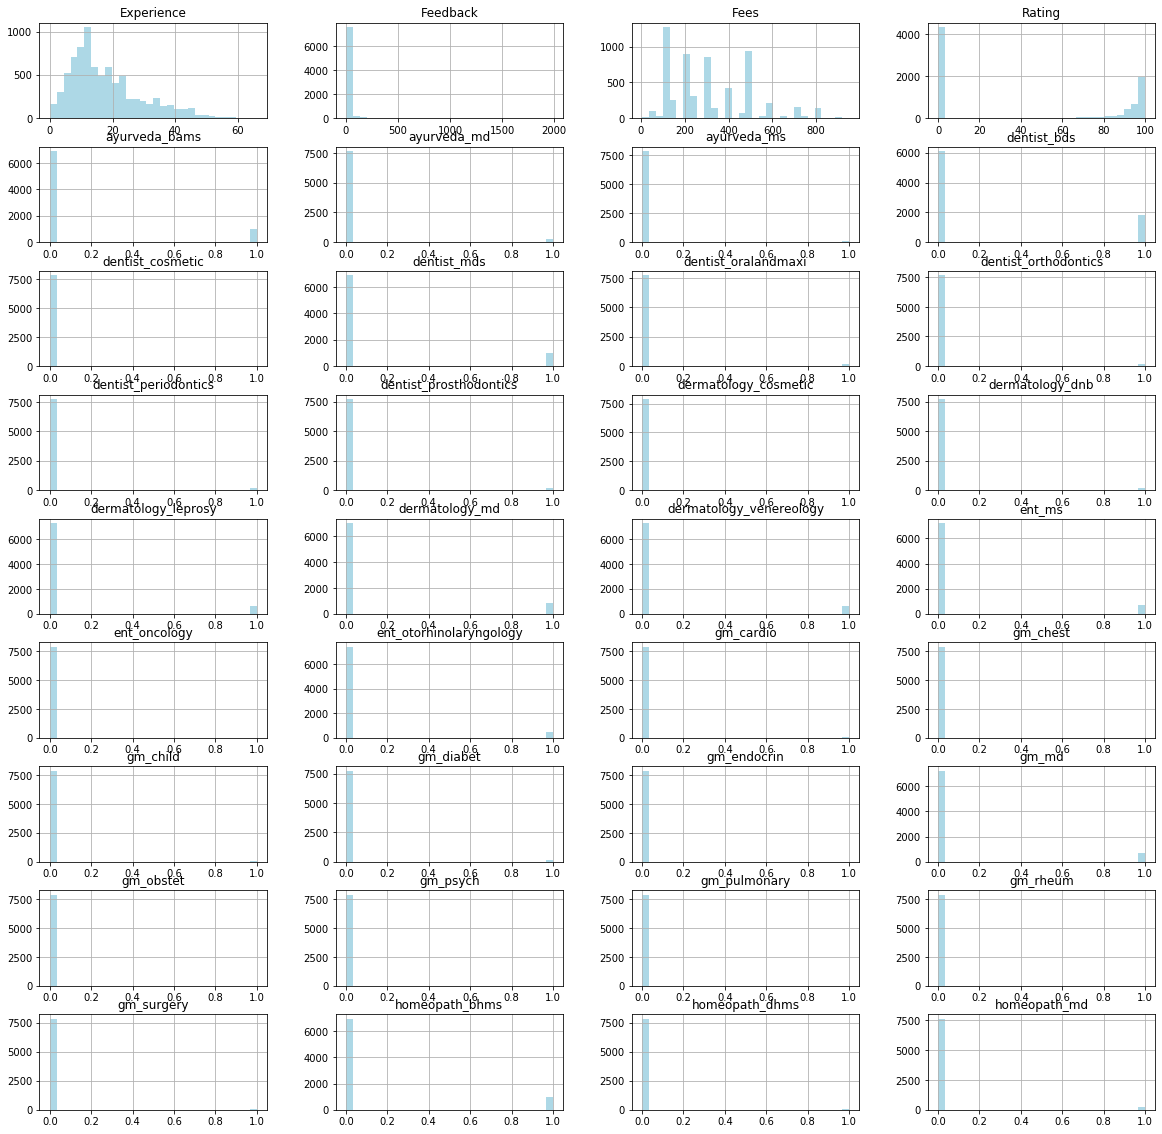

In [77]:
# Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(9,4),bins=30,color='lightblue') 

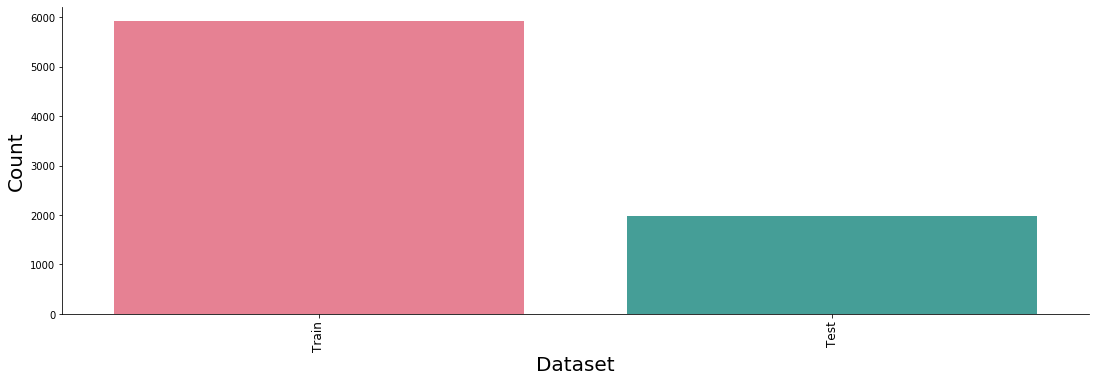

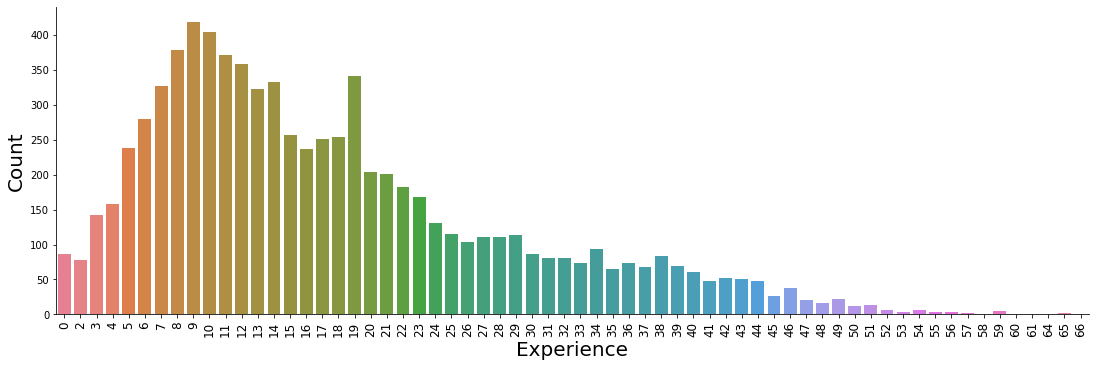

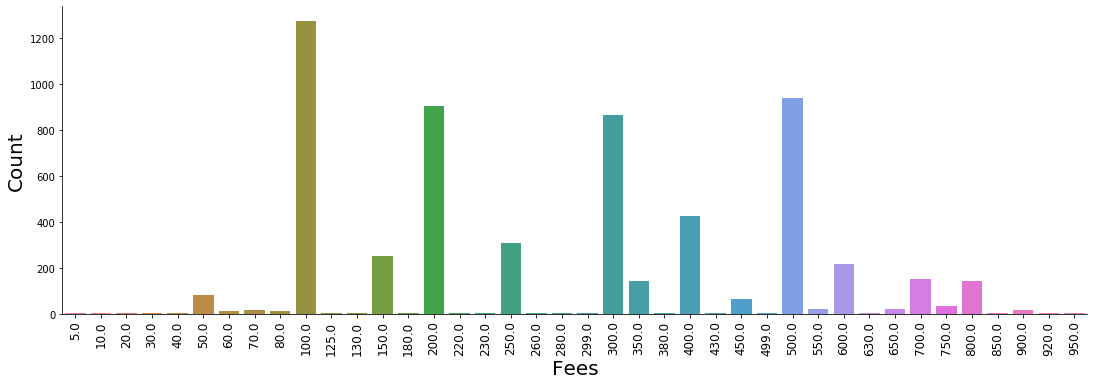

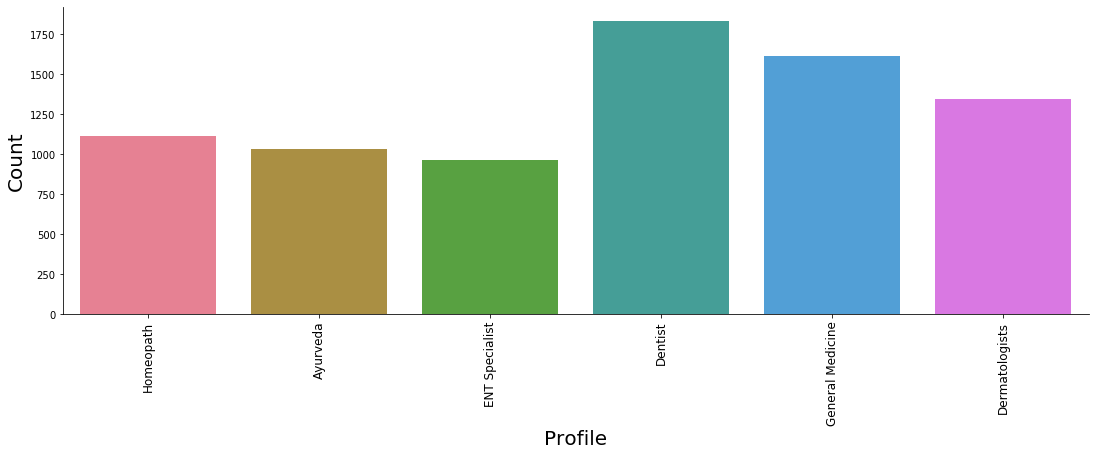

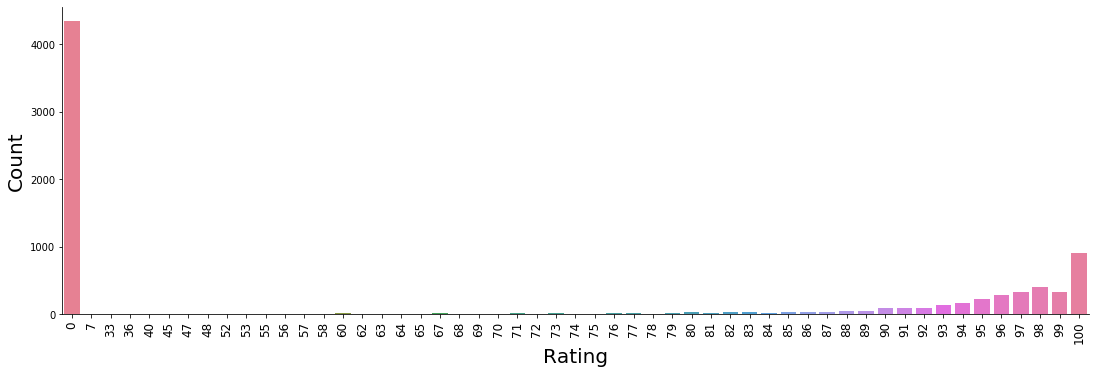

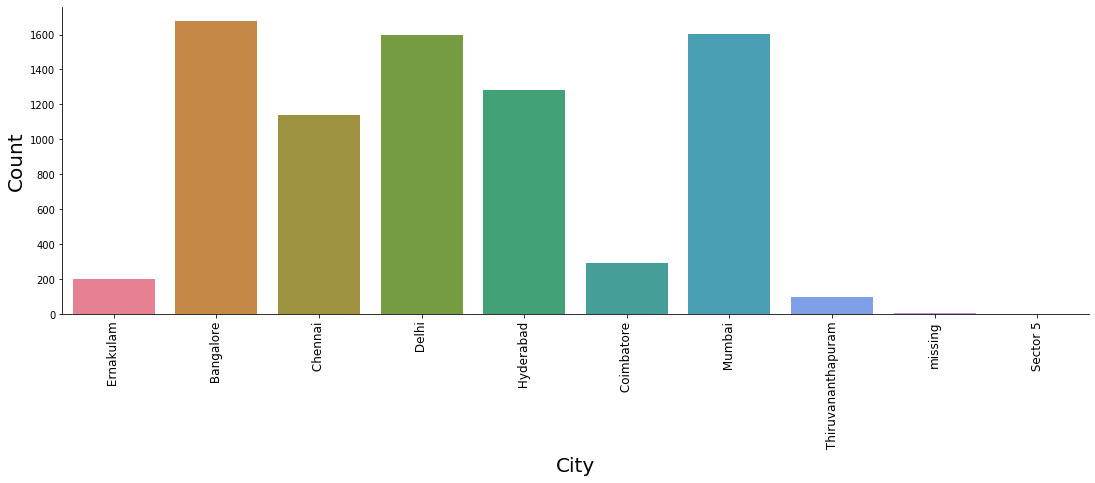

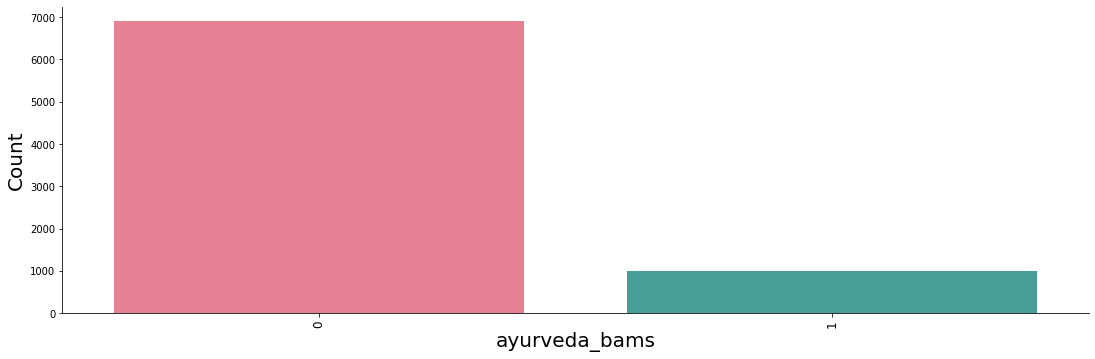

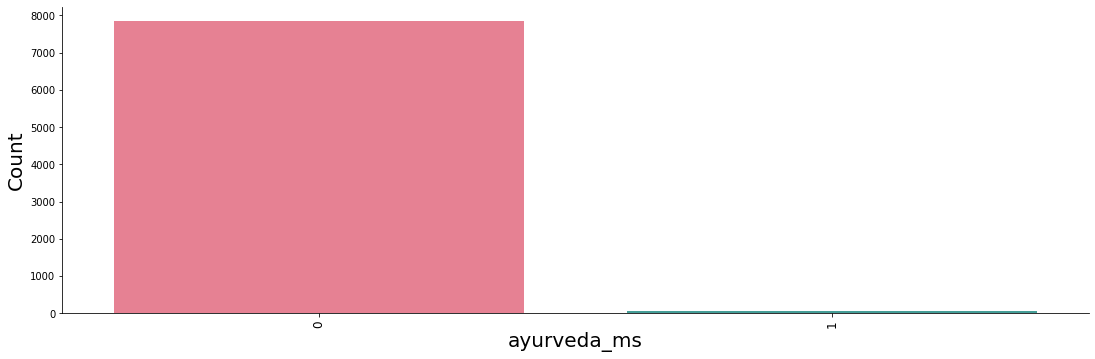

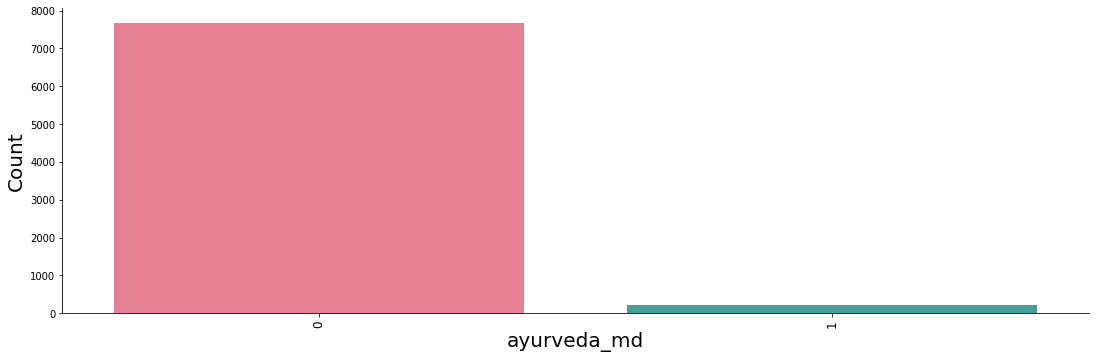

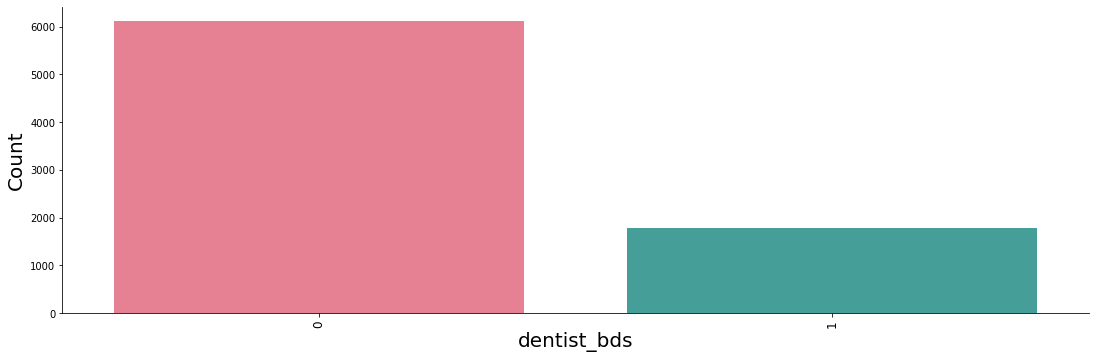

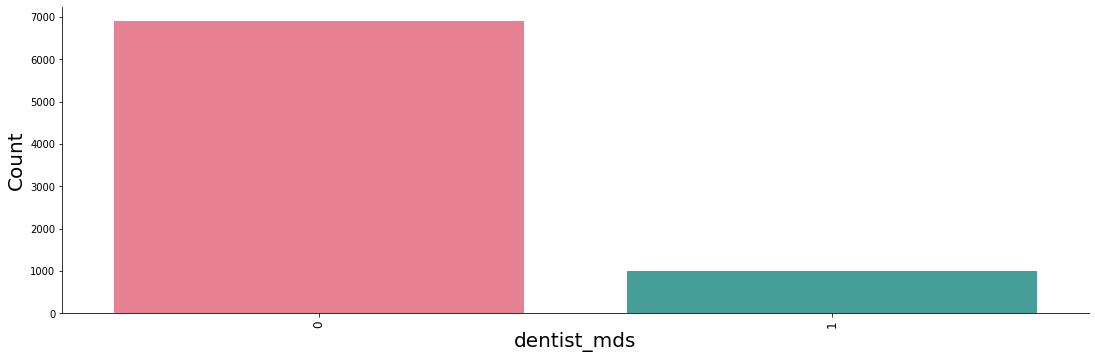

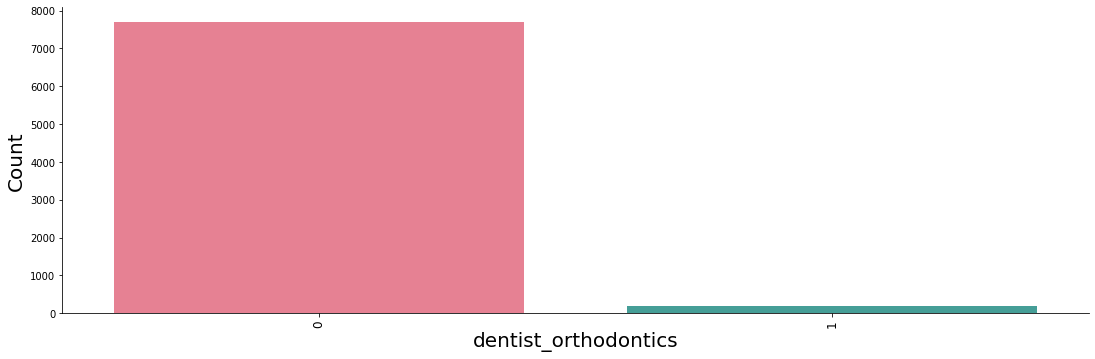

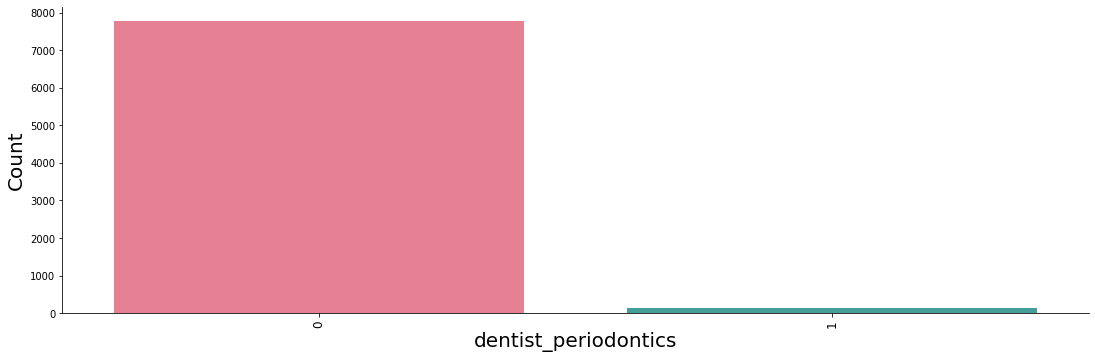

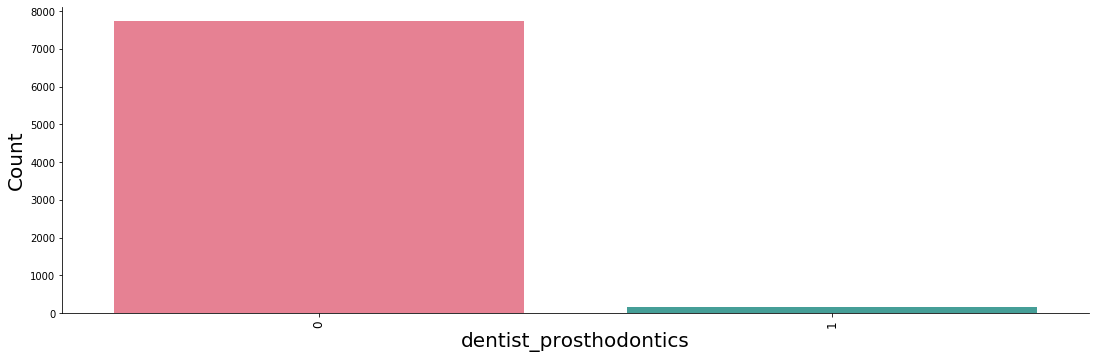

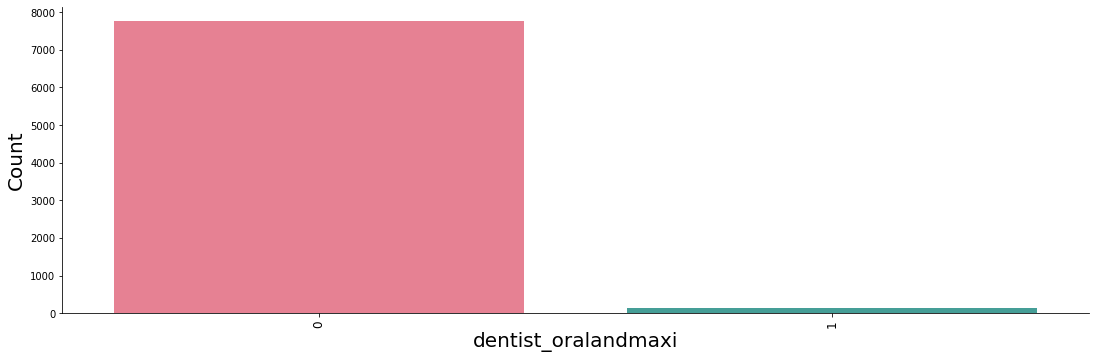

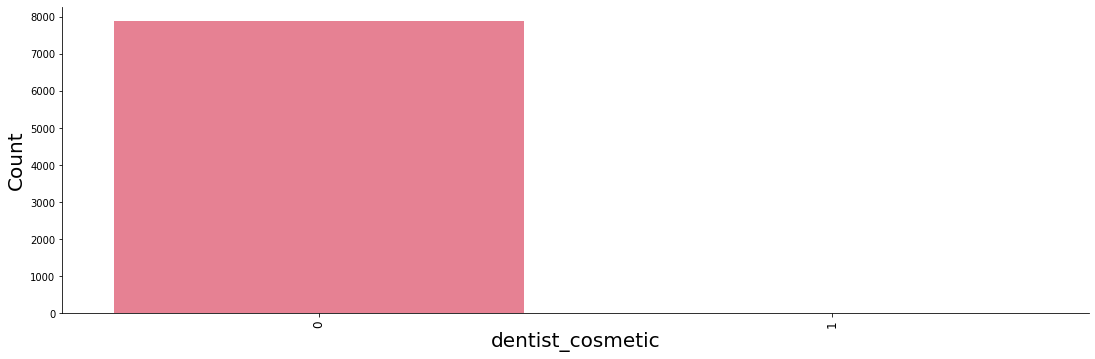

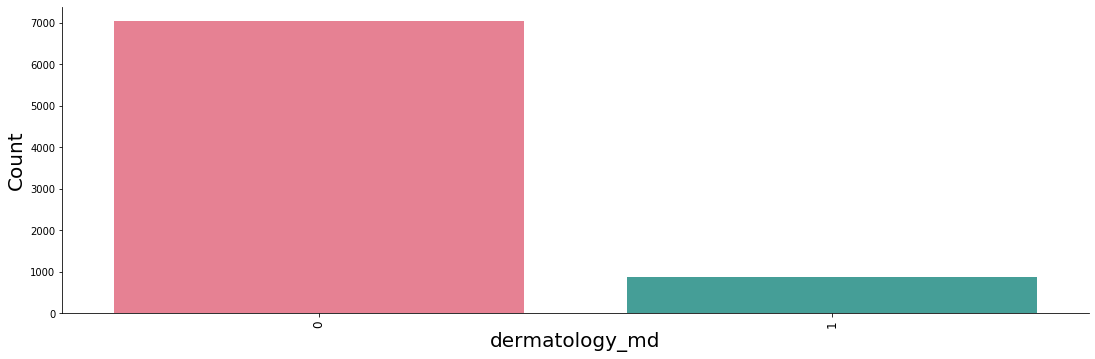

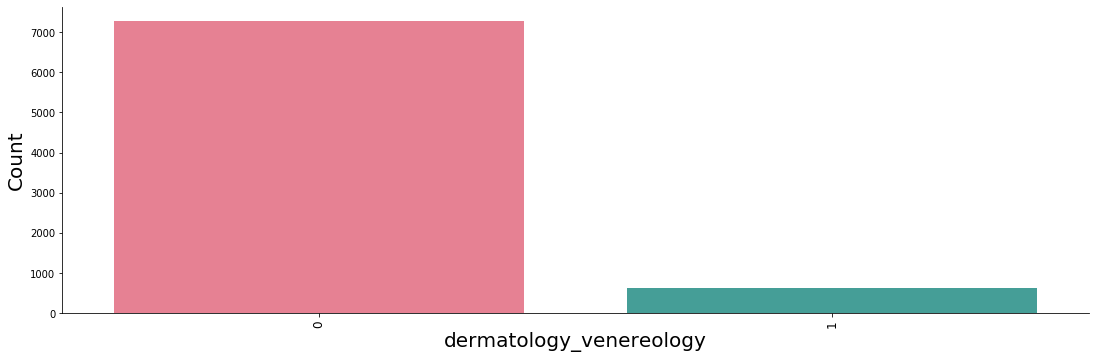

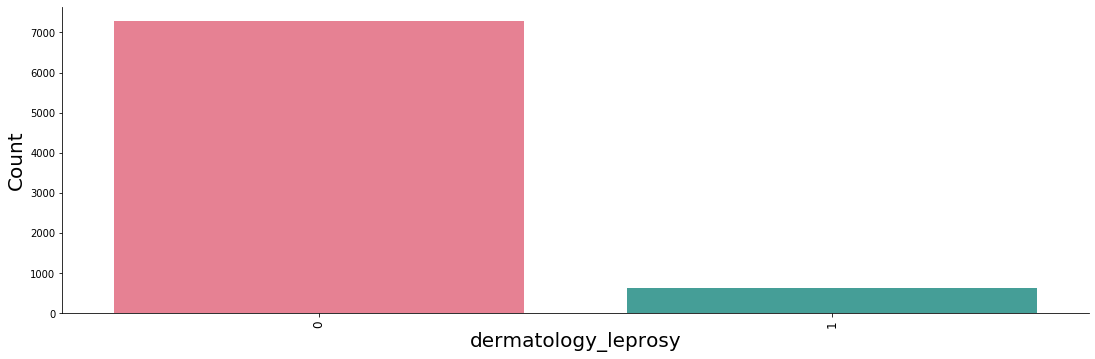

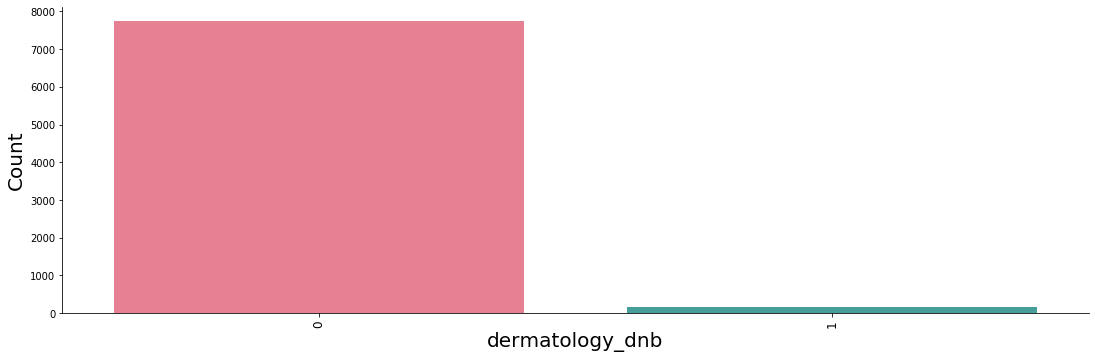

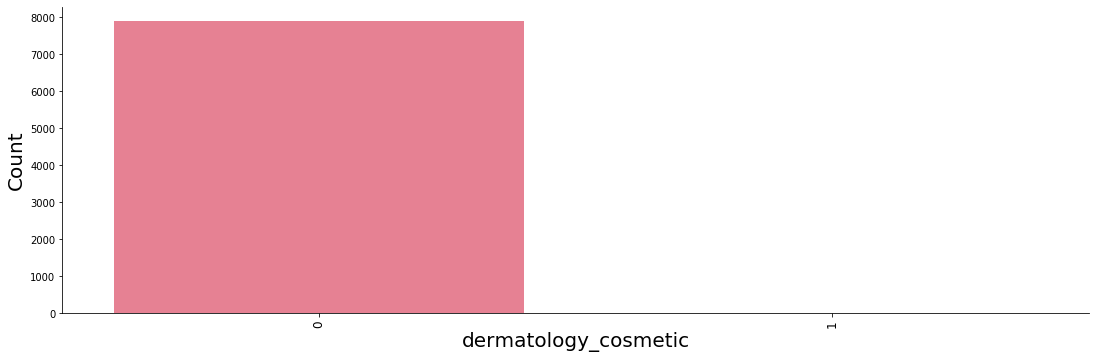

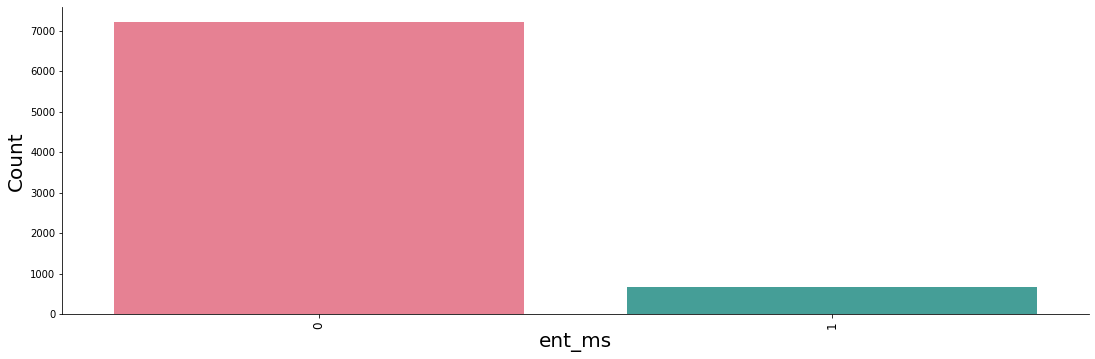

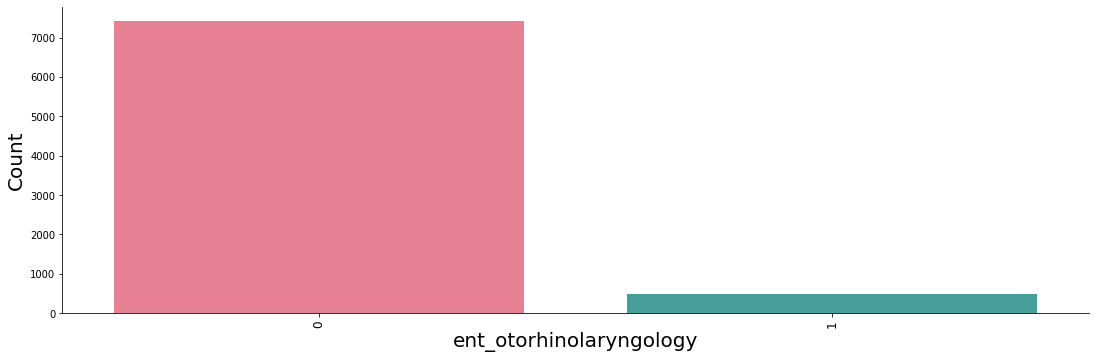

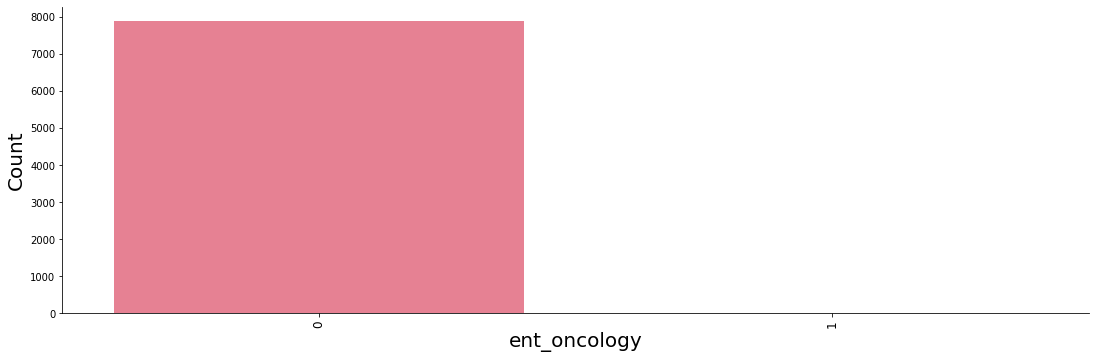

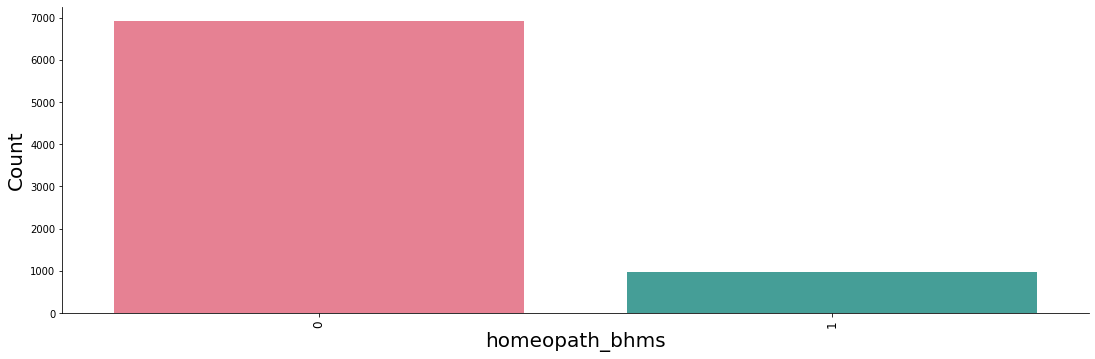

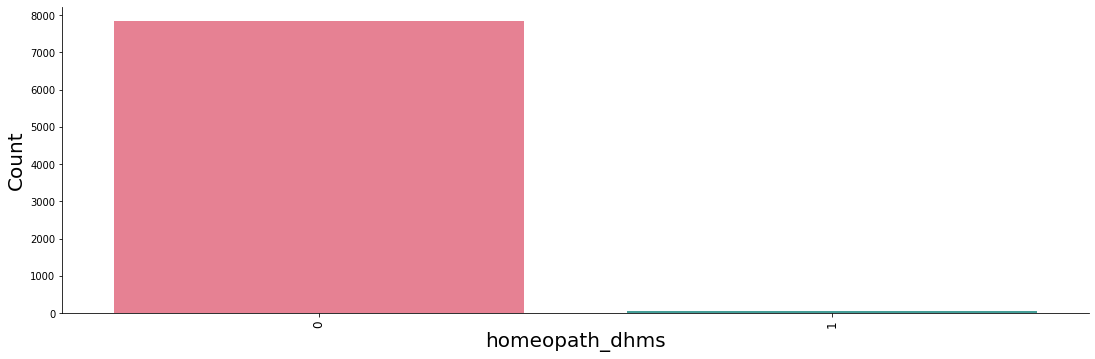

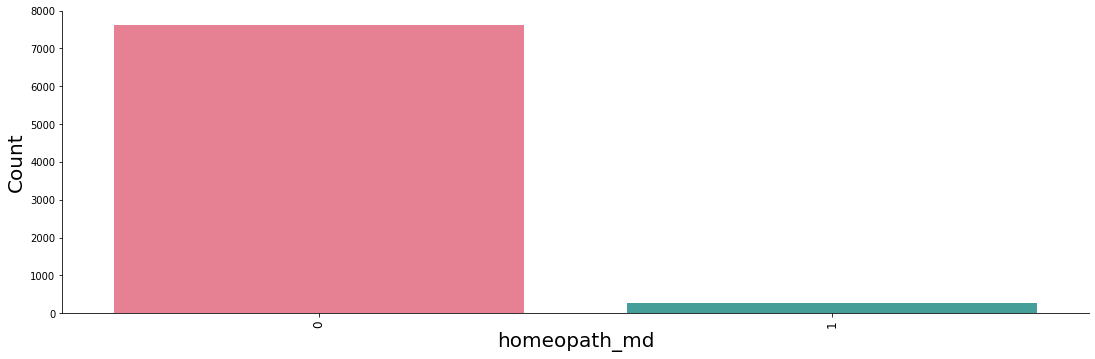

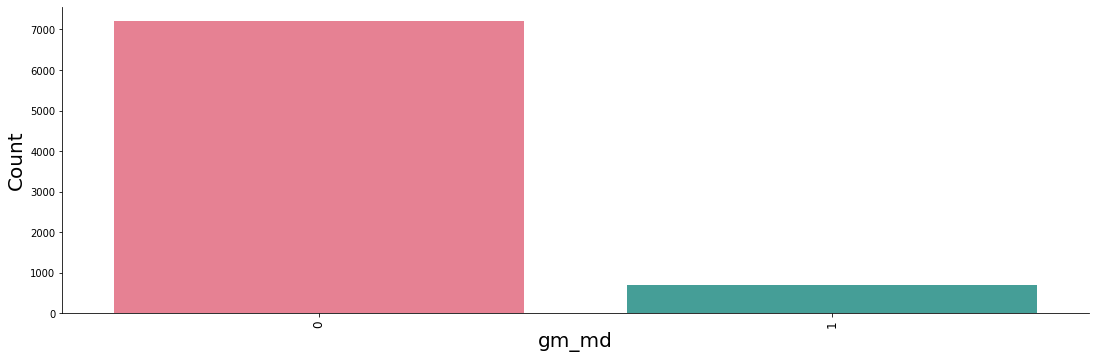

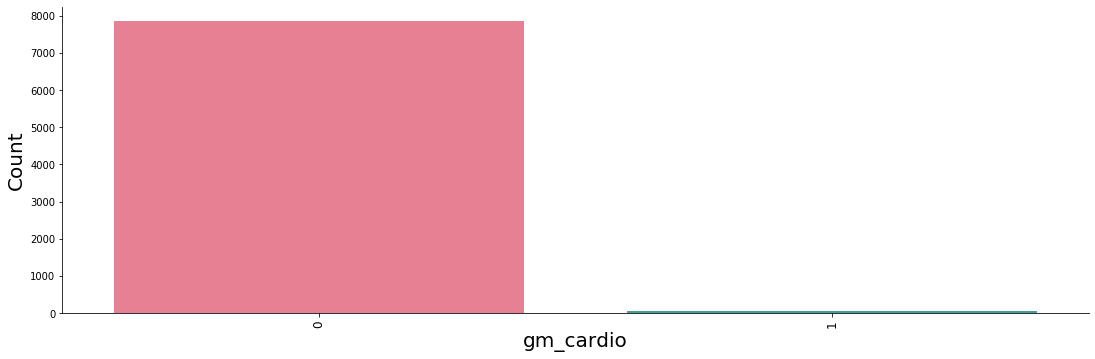

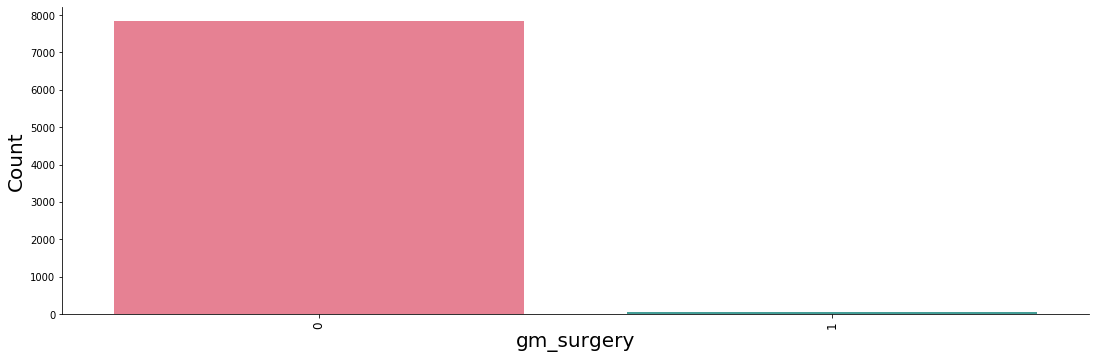

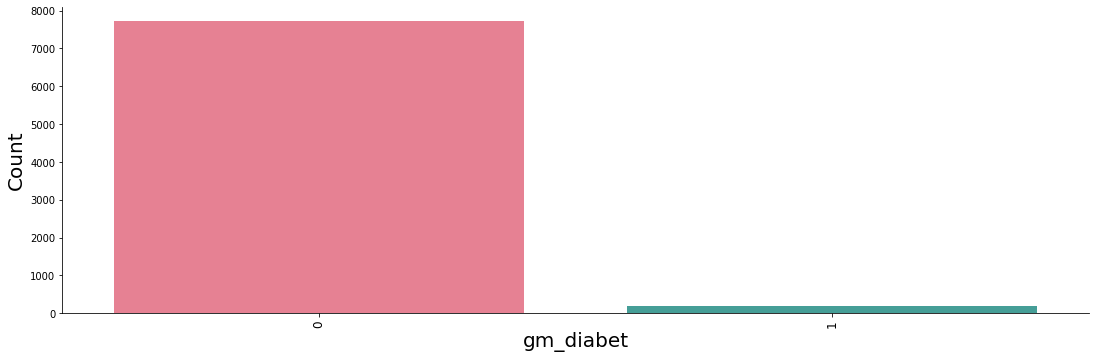

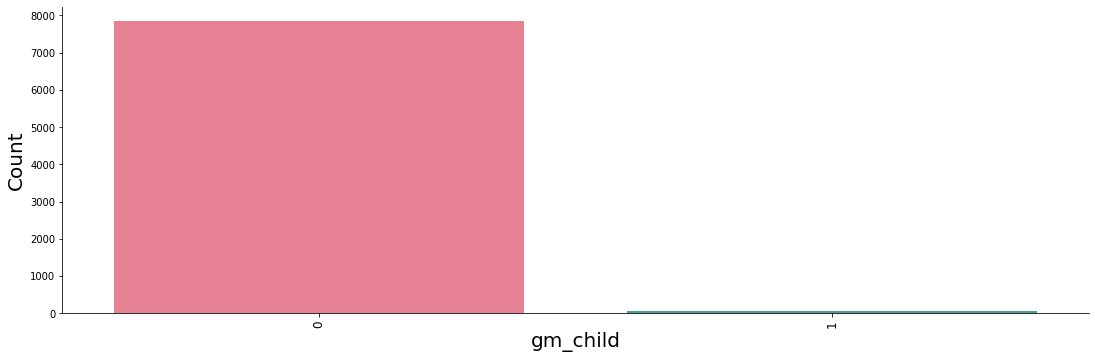

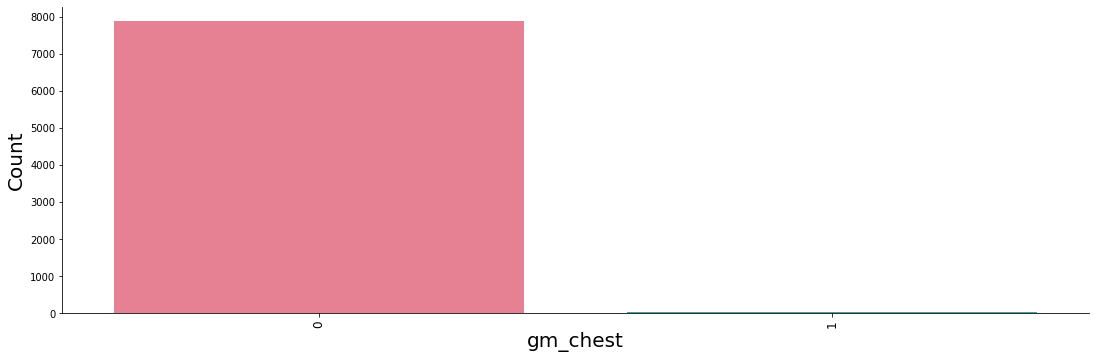

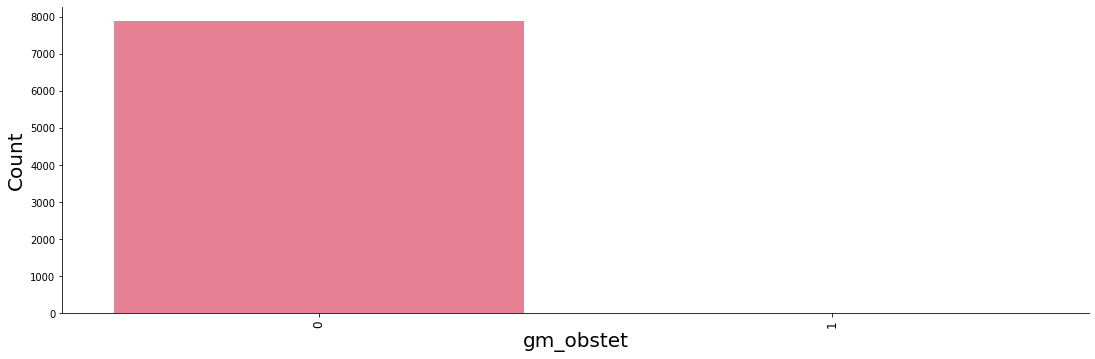

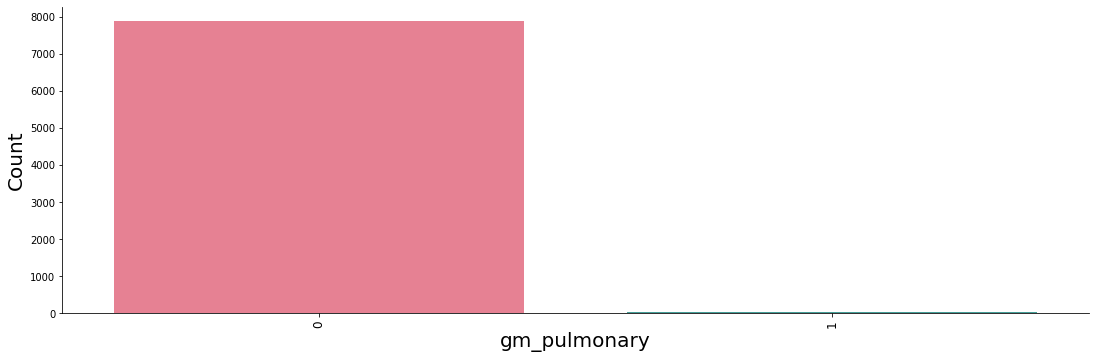

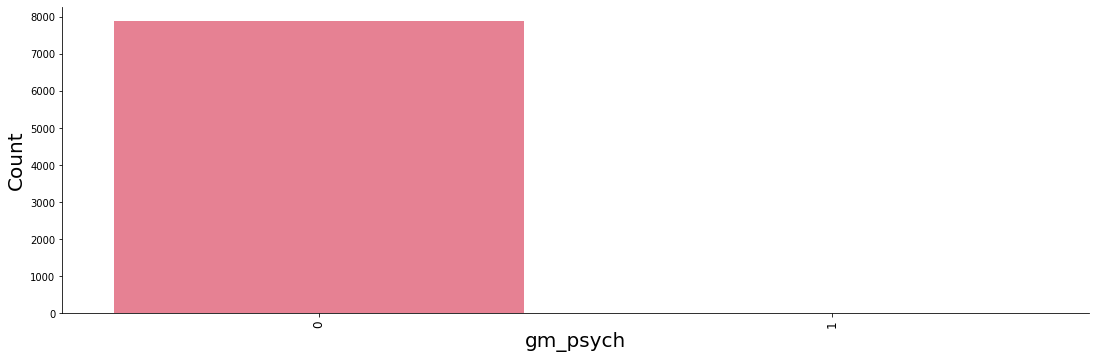

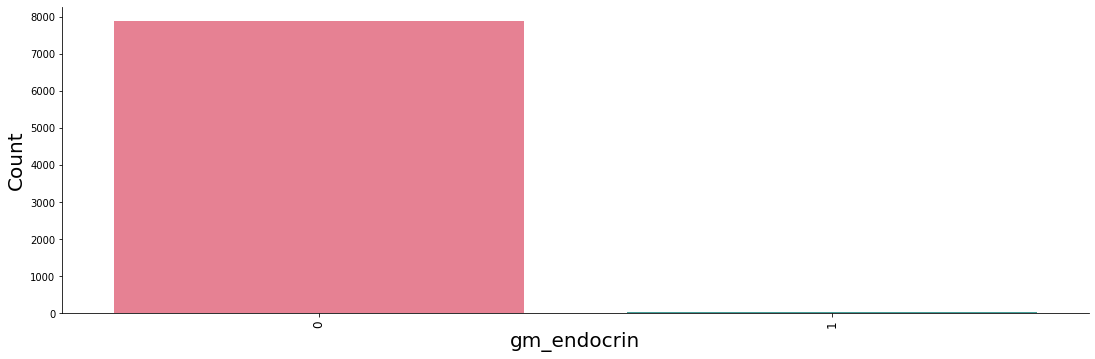

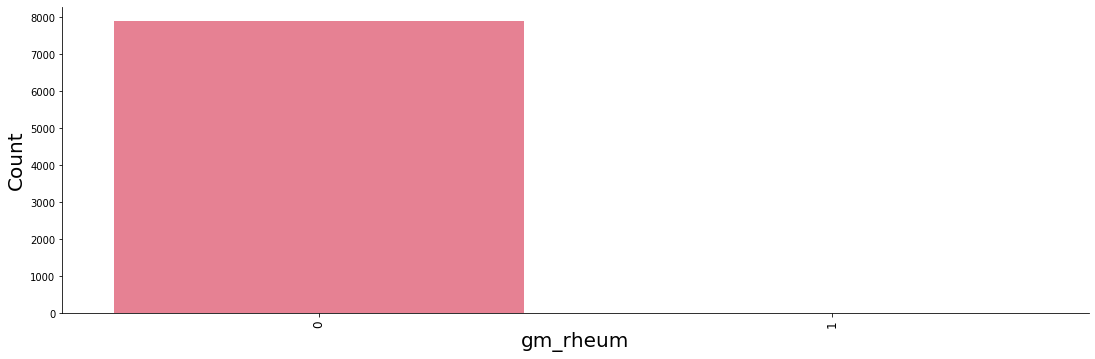

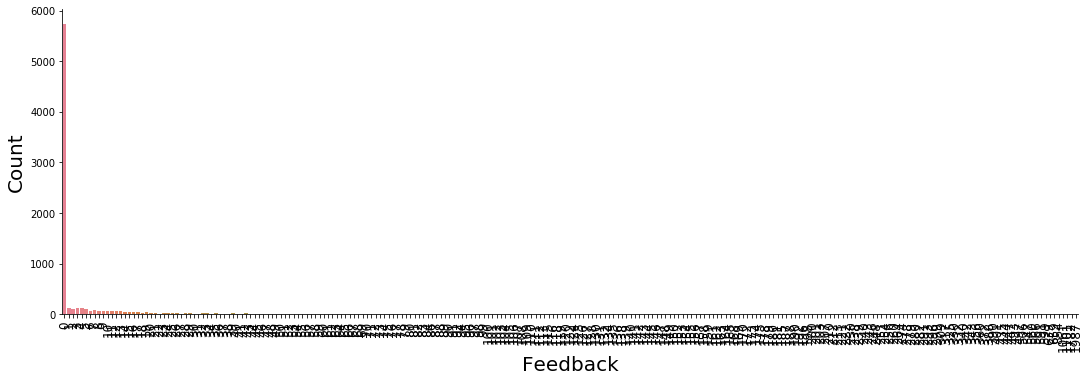

In [78]:
# for loop to create Counting plots of different instances
for i in df.drop(['Area'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:              

1) Most of the doctors have 9 years of experience.         
2) Maximun doctors taking 100 rupees fees.  
3) Most of the doctors are Dentish profession.                 
4) Most of the doctors gets 100 rating.             
5) Most of the doctors are from banglore.     

# Bivariant Analysis:

In [79]:
#Separate categorical and numberical columns
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

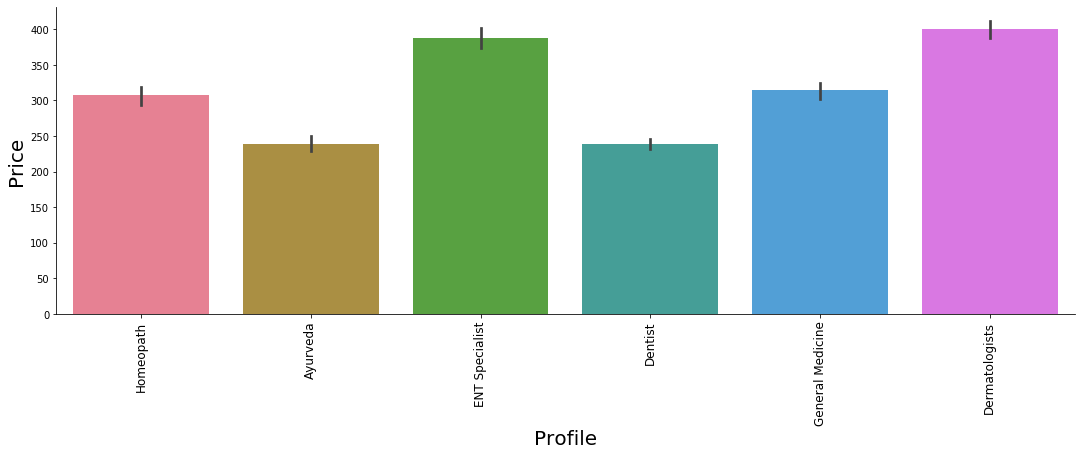

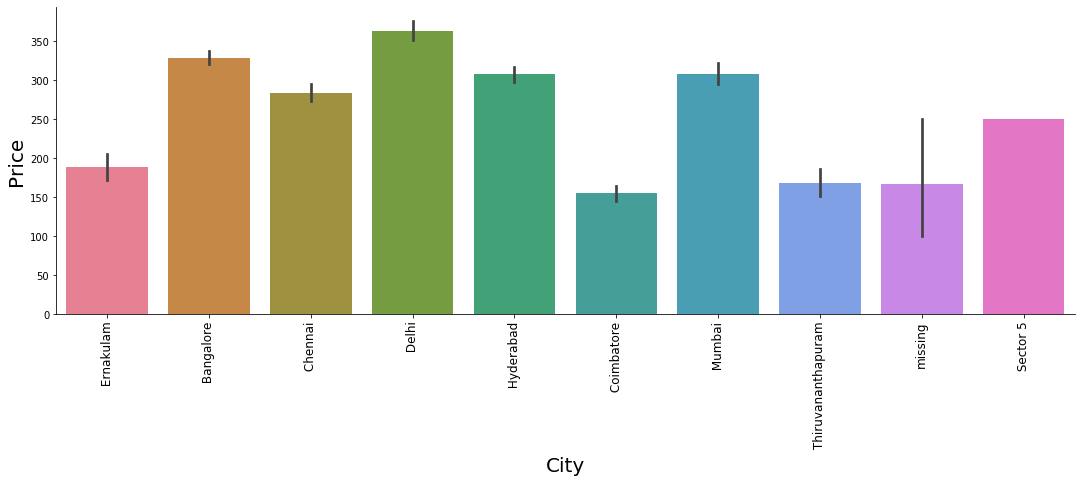

In [80]:
# for loop to create graph between Profile,City and Fees...
for i in ['Profile','City']:
    sns.catplot(x=i,
                data=df,
                y='Fees',
                height=5,
                aspect=3,
                palette='husl',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

#### Information from the Graph:           

1) Doctores from Deematologistis profession charges the most as compared to other specification.      
2) In Delhi doctors charges the most.          

In [ ]:
# Graph between Rating, Experience and Fees....
for i in ['Rating','Experience']:
    sns.catplot(x=i,
                data=df,
                y='Fees',
                height=5,
                aspect=3,
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

#### Information from the Graph:                 

1) As experience increases doctors price also increases.                 
2) More rating of doctors  charges more as compared to low rating.       

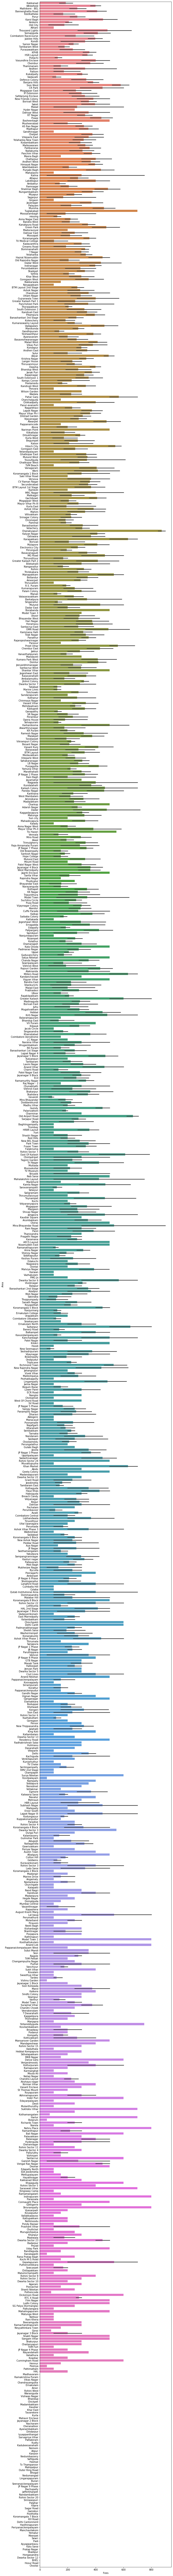

In [82]:
# Plot between Fees and Area...
df_1=df.loc[df["Dataset"]=='Train']
plt.figure(figsize=(10,200))
sns.barplot(x='Fees',y='Area',data=df_1,palette='husl')

##### Area Chankyapuri have Highest Doctor fee.

In [83]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Dataset,Experience,Fees,Profile,Rating,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback
0,1,24,100.0,5,100,324,4,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,1,12,350.0,0,98,925,0,1,0,1,...,0,0,0,0,0,0,0,0,0,76
2,1,9,300.0,3,0,494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,12,250.0,0,0,74,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,20,250.0,0,100,367,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0,10,NaN,0,0,76,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7944,0,4,NaN,2,0,135,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7945,0,9,NaN,4,0,658,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7946,0,12,NaN,1,98,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Checking Skewness....
df.skew()

Dataset                    -1.153556
Experience                  0.993071
Fees                        0.746366
Profile                     0.085763
Rating                      0.230069
Area                        0.103471
City                        0.045883
ayurveda_bams               2.252769
ayurveda_ms                11.859269
ayurveda_md                 5.796643
dentist_bds                 1.311129
dentist_mds                 2.245864
dentist_orthodontics        6.059968
dentist_periodontics        7.632548
dentist_prosthodontics      6.700672
dentist_oralandmaxi         7.394644
dentist_cosmetic           22.152899
dermatology_md              2.503053
dermatology_venereology     3.108843
dermatology_leprosy         3.137908
dermatology_dnb             6.880235
dermatology_cosmetic       26.742890
ent_ms                      2.965816
ent_otorhinolaryngology     3.667960
ent_oncology               21.487367
homeopath_bhms              2.271943
homeopath_dhms             10.887867
h

In [85]:
# Removing Skewness
for i in df.drop(['Fees'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [86]:
# Checking skewness again
df.skew()

Dataset                    -1.153556
Experience                 -0.789813
Fees                        0.746366
Profile                     0.085763
Rating                      0.230069
Area                        0.103471
City                        0.045883
ayurveda_bams               2.252769
ayurveda_ms                11.859269
ayurveda_md                 5.796643
dentist_bds                 1.311129
dentist_mds                 2.245864
dentist_orthodontics        6.059968
dentist_periodontics        7.632548
dentist_prosthodontics      6.700672
dentist_oralandmaxi         7.394644
dentist_cosmetic           22.152899
dermatology_md              2.503053
dermatology_venereology     3.108843
dermatology_leprosy         3.137908
dermatology_dnb             6.880235
dermatology_cosmetic       26.742890
ent_ms                      2.965816
ent_otorhinolaryngology     3.667960
ent_oncology               21.487367
homeopath_bhms              2.271943
homeopath_dhms             10.887867
h

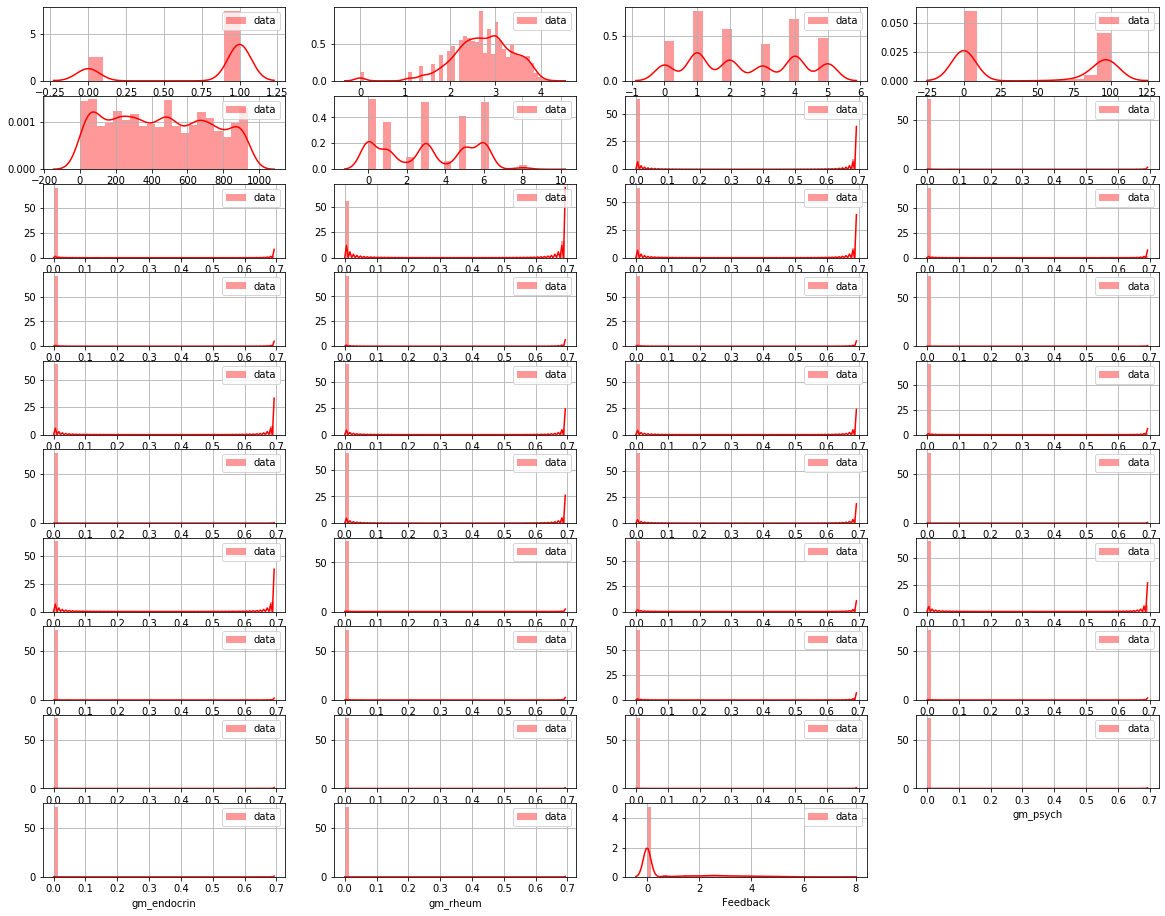

In [87]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['Fees'],axis=1).columns.values)):
    plt.subplot(10,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [88]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

(40.0, 0.0)

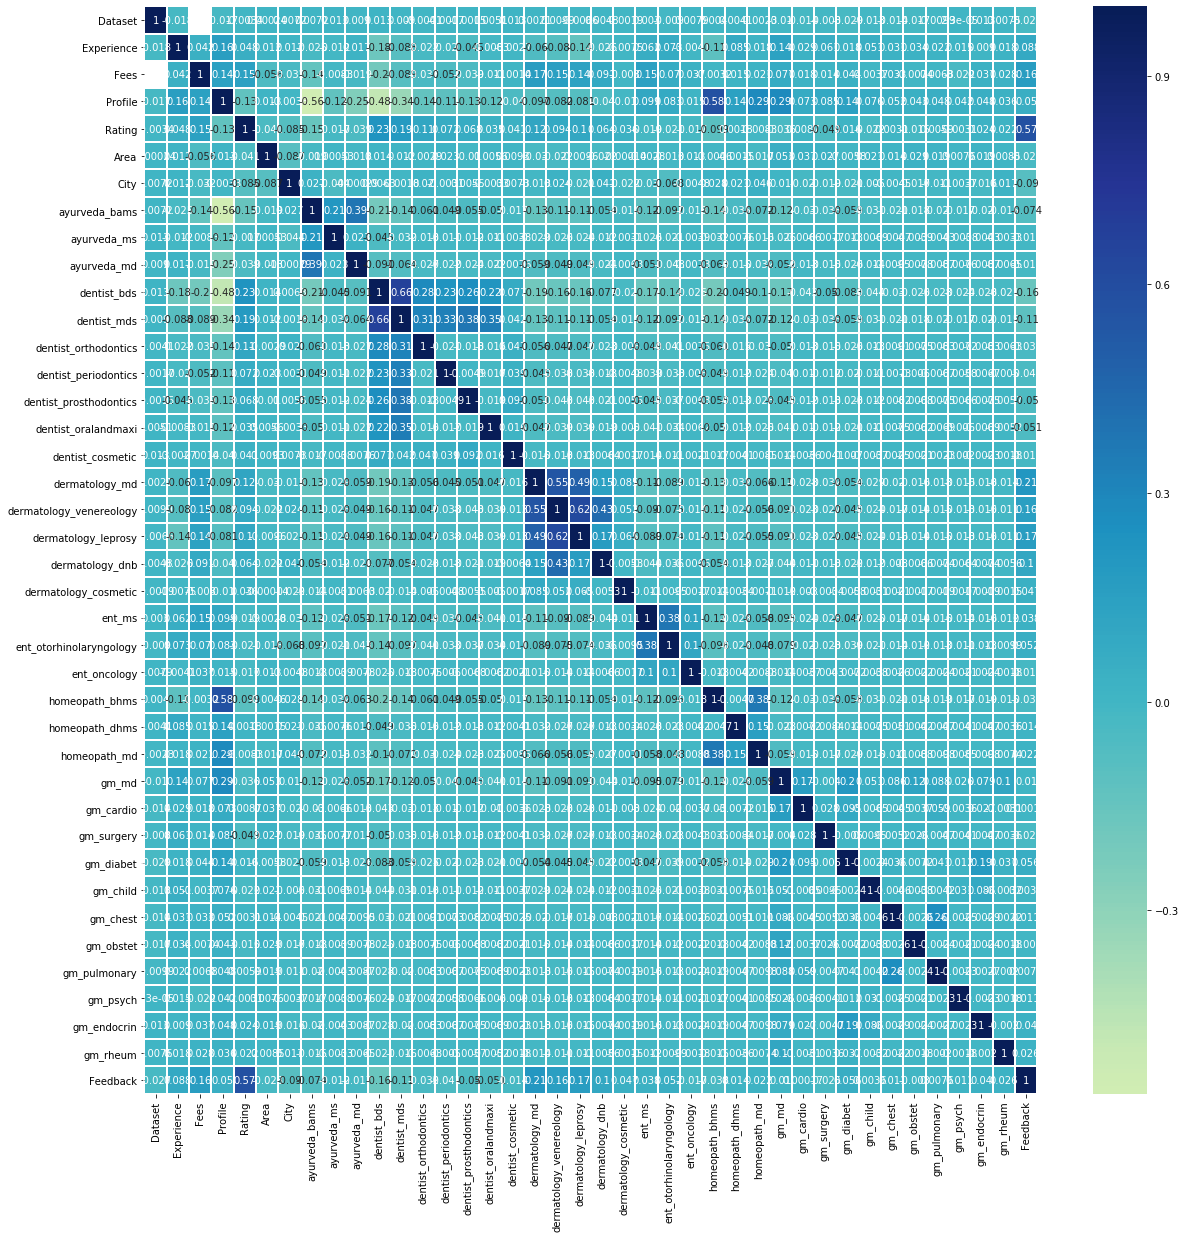

In [89]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [90]:
#Lets seprate the train and test from df( Dataset Train is having value==1) and ( Dataset Test is having value==0)
df_train=df.loc[df["Dataset"]==1]
df_test=df.loc[df["Dataset"]==0]

In [91]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [92]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Fees","Dataset"],inplace=True)
df_train.drop(columns=["Dataset"],inplace=True)

In [93]:
#lets divide the df_train into input and output
X = df_train.drop("Fees", axis=1)
y = df_train["Fees"]

In [94]:
# Independent variables (no target column)
X.head()

,Experience,Profile,Rating,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,...,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback
0,3.218876,5,100,324,4,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213
1,2.564949,0,98,925,0,0.693147,0.0,0.693147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.343805
2,2.302585,3,0,494,0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,2.564949,0,0,74,0,0.693147,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,3.044522,0,100,367,1,0.693147,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438


In [95]:
# Target variable
y

0       100.0
1       350.0
2       300.0
3       250.0
4       250.0
        ...  
5956    300.0
5957    100.0
5958    600.0
5959    100.0
5960    200.0
Name: Fees, Length: 5921, dtype: float64

In [96]:
#checking shape of input variable
X.shape

(5921, 38)

In [97]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Experience,Profile,Rating,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,...,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback
0,0.751384,1.539642,1.213827,-0.443830,0.398326,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,1.494490
1,-0.225759,-1.472590,1.171605,1.724387,-1.321942,2.615795,-0.087512,5.869846,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,2.575451
2,-0.617802,0.334749,-0.897267,0.169476,-1.321942,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922
3,-0.225759,-1.472590,-0.897267,-1.345751,-1.321942,2.615795,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922
4,0.490853,-1.472590,1.213827,-0.288700,-0.891875,2.615795,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,0.618772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,0.417948,0.334749,1.171605,-1.338536,-1.321942,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,2.206806
5917,1.210850,0.937195,-0.897267,0.490560,-0.891875,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922
5918,1.526603,0.937195,1.150494,-0.772129,-0.031741,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,1.245246
5919,0.084511,0.937195,1.002718,1.663056,1.258460,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.08945,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922


## Model Training

In [98]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGB= XGBRegressor()

In [99]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [ ]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGB))

#    Creating list to store scores...
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]


# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 70 is: 0.10051101309451904
Learning Score :  0.3443946653757365
R2 Score :  0.10051101309451904


Cross Val Score :  0.04641731202167404


Mean Squared Error :  28703.708860759492


Root Mean Squared Error :  169.42168946377407


*************************** SVR *****************************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 70 is: 0.08803435291686723
Learning Score :  0.059665757486506814
R2 Score :  0.08803435291686723


Cross Val Score :  0.06277610947662259


Mean Squared Error :  29101.853169925544


Root Mean Squared Error :  170.

In [ ]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})   
result.style.background_gradient(cmap='YlGnBu')

## Hyper Parameter Tuning

In [ ]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(estimator=mod,param_grid=parameters,scoring='r2' ,cv=5,verbose=2,n_jobs=-1)
    clf.fit(x_train,y_train)
    print(clf.best_params_)

##### ==> Grid Search for XGBRegressor

In [ ]:
#.................Grid Search for XGBRegressor..........
from xgboost import XGBRegressor
xgb= XGBRegressor()
parameters= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
grid_cv(xgb,parameters)

In [ ]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate= 0.15, max_depth= 10, min_child_weight= 3)
max_r2_score(xgb)

##### ==> Grid Search for GradientBoostingClassifier

In [ ]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters)

In [ ]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gbr)kl

In [ ]:
import lightgbm as lgb
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(x,y)
grid_search.best_estimator_

In [ ]:
lgbr=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=25,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
max_r2_score(lgbr)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 63,test_size=0.20)
lgbm =lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=25,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbm.fit(x_train, y_train)
lgbmpred = lgbm.predict(x_test)

In [ ]:
cost_pred=lgbm.predict(df_test)

In [ ]:
a=pd.DataFrame(cost_pred)
a

In [ ]:
actual_value=pd.read_excel('Doctor_fee_check.xlsx',ignore_index=True)
actual_value

In [ ]:
# Printing predicted values
test=pd.DataFrame(data=actual_value,)
test['Predicted values']=cost_pred
test

In [ ]:
cost_pred=lgb_model.predict(df_test)

## Conclusion:

1) Most of the doctors have 9 years of experience.
2) Maximun doctors taking 100 rupees fees.
3) Most of the doctors are Dentish profession.
4) Most of the doctors gets 100 rating.
5) Most of the doctors are from banglore. 
6) Doctores from Deematologistis profession charges the most as compared to other specification.
7) In Delhi doctors charges the most. 
8) As experience increases doctors price also increases.
9) More rating of doctors charges more as compared to low rating. 
10) Area Chankyapuri have Highest Doctor fee

## Steps Followed: 

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_17_Flight_Price_submission.csv file.
9) Pickle file is named with Project_17_Flight_price_submission.pkl 